In [1]:
#import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import seaborn as sns

In [2]:
# bring in both the 'employers' and 'unions'
employers_clean_path = "resources/employers_clean.csv"
union_data_path = "resources/union_data.csv"

In [3]:
employers_clean_path = pd.read_csv(employers_clean_path)
union_data_path = pd.read_csv(union_data_path)

In [4]:
data_df = pd.merge(union_data_path, employers_clean_path,  how='right', on='Country')
data_df.head()

# Display the dataframe for preview

data_df = data_df[['RANK', 'NAME', 'TICKER', 'INDUSTRIES', 
                               'Country', 'EMPLOYEES', 'City', 'Glassdoor Rating', 'obs_value']]

data_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,City,Glassdoor Rating,obs_value
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",Suwon,3.8,NaN
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",Redmond,4.4,10.3
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",Armonk,4.2,10.3
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",Mountain View,4.5,10.3
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",Cupertino,4.1,10.3


In [5]:
employers = data_df["RANK"].value_counts()
number_of_employers=len(employers)
number_of_employers

100

In [6]:
#explotatory data analysis on the top 50 companies.
forbes_50 = data_df[data_df["RANK"] != 'none'].reset_index(drop=True)
forbes_50.head(50)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,City,Glassdoor Rating,obs_value
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",Suwon,3.8,NaN
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",Redmond,4.4,10.3
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",Armonk,4.2,10.3
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",Mountain View,4.5,10.3
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",Cupertino,4.1,10.3
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,"80,000",Atlanta,4.2,10.3
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,"288,000",Issaquah,4.0,10.3
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,"25,988",San Jose,4.4,10.3
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,"55,093",Dallas,4.4,10.3
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000",Round Rock,4.3,10.3


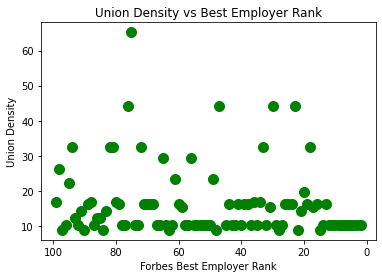

In [7]:
#This plots company Forbes ranking performance agains union membership density 
data_df.plot.scatter(x='RANK',y='obs_value', title='Union Density vs Best Employer Rank', s=100, c= 'green')
                     
plt.xlabel("Forbes Best Employer Rank")
plt.ylabel("Union Density")

#This inverts the x-axis so the rankings increase from 100 to 1.
plt.gca().invert_xaxis()




In [8]:
#This tests the relationship between Forbes ranking and union density.
correlation=data_df["RANK"].corr(data_df["obs_value"])
correlation

0.14256551710368537

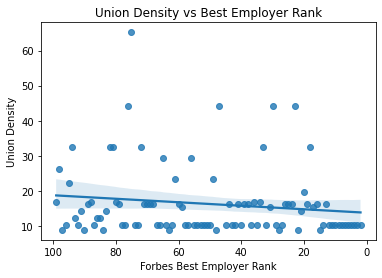

In [9]:
#This plots the relationship between Forbes ranking and union density, with a regression line included.
correlation=sns.regplot(x=data_df["RANK"], y=data_df["obs_value"],)
correlation.set_title("Union Density vs Best Employer Rank")
plt.xlabel("Forbes Best Employer Rank")
plt.ylabel("Union Density")

#This inverts the x-axis so the rankings increase from 100 to 1.
plt.gca().invert_xaxis()